<a href="https://colab.research.google.com/github/silviapalves/ImersaoAlura/blob/main/Silvia_Pedrosa_Alves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introdução
####Este relatório faz duas análises relacionando os dados de escolas públicas e privadas e dois modelos de machine learning para prever a nota da competencia 3 de redação dadas as notas da competência 1, 2, 4 e 5.

##Índice
####1. Importação dos dados
>1.1 Dados do ENEM

>1.2 Dados do Censo Educação Superior

####2. Análise 1

>2.1 Objetivo

>2.2 Premissas e conclusões

####3. Análise 2

>3.1 Objetivo

>3.2 Premissas e conclusões


####4. Modelos de machine learning 

>4.1 Objetivo

>4.2 Escolas públicas

>4.3 Escolas privadas

>4.4 Premissas e conclusões



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict

####1. Importação dos dados

In [ ]:
educacao_sup = "https://github.com/silviapalves/ImersaoAlura/blob/main/data_sup1.csv?raw=true"
enem = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados_educacao_sup = pd.read_csv(educacao_sup)
dados_enem = pd.read_csv(enem)

>1.1 Dados do ENEM


In [ ]:
materias = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]
dados_enem["NU_NOTA_TOTAL"] = dados_enem[materias].sum(axis=1)

dados_enem_escola_publica = dados_enem.query("TP_ESCOLA == 2 & NU_NOTA_TOTAL != 0")
dados_enem_escola_privada = dados_enem.query("TP_ESCOLA == 3 & NU_NOTA_TOTAL != 0")
dados_enem_escola_NA = dados_enem.query("TP_ESCOLA != 3 & TP_ESCOLA != 2 & NU_NOTA_TOTAL != 0")
size_enem = len(dados_enem_escola_publica)+len(dados_enem_escola_privada)+len(dados_enem_escola_NA)
size_enem_nan = len(dados_enem_escola_publica)+len(dados_enem_escola_privada)

y_enem = [len(dados_enem_escola_publica)/size_enem_nan*100, len(dados_enem_escola_privada)/size_enem_nan*100]
x_enem = ["Publica", "Privada","NaN"]

>1.2 Dados do Censo Educação Superior

In [ ]:
dados_sup_escola_publica = dados_educacao_sup.query("TP_ESCOLA_CONCLUSAO_ENS_MEDIO == 1")
dados_sup_escola_privada = dados_educacao_sup.query("TP_ESCOLA_CONCLUSAO_ENS_MEDIO == 2")
dados_sup_escola_NA = dados_educacao_sup.query("TP_ESCOLA_CONCLUSAO_ENS_MEDIO == 9")
size_sup = len(dados_sup_escola_publica)+len(dados_sup_escola_privada)+len(dados_sup_escola_NA)
dados_educacao_sup["TP_ESCOLA_CONCLUSAO_ENS_MEDIO"].value_counts()
size_sup_nan = len(dados_sup_escola_publica)+len(dados_sup_escola_privada)

y_sup = [len(dados_sup_escola_publica)/size_sup_nan*100, len(dados_sup_escola_privada)/size_sup_nan*100]
x_sup = ["Publica", "Privada"]

####2. Análise 1

>2.1 Objetivo

Visualizar a diferença entre inscritos provinientes de escolas públicas e privadas no ENEM e cursando o ensino superior.

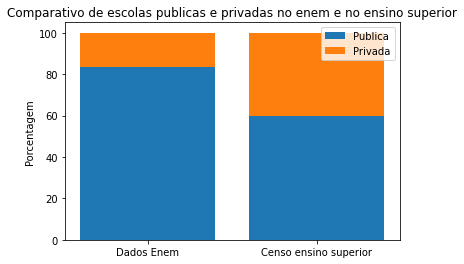


Porcentagem de dados sem informação:
ENEM: 67.53 % 
Censo Educação Superior: 0.31 %

% Escola pública ENEM - % Escola pública Censo: 23.6 % 
% Escola privada ENEM - % Escola privada Censo: -23.6 % 


In [ ]:
y = np.array([y_enem,y_sup]).T
labels = ["Dados Enem","Censo ensino superior"]
plt.bar(labels,y[0])
plt.bar(labels,y[1],bottom=y[0])
plt.legend(x_sup)
plt.ylabel ("Porcentagem")
plt.title ("Comparativo de escolas publicas e privadas no enem e no ensino superior")
plt.show()

porcentagem_nan_enem = len(dados_enem_escola_NA)/size_enem*100
porcentagem_nan_censo = len(dados_sup_escola_NA)/size_sup*100

dif_pub = y_enem[0]-y_sup[0]
dif_pri = y_enem[1]-y_sup[1]

print(f"\nPorcentagem de dados sem informação:\nENEM: {round(porcentagem_nan_enem,2)} % \nCenso Educação Superior: {round(porcentagem_nan_censo,2)} %")

print(f"\n% Escola pública ENEM - % Escola pública Censo: {round(dif_pub,2)} % \n% Escola privada ENEM - % Escola privada Censo: {round(dif_pri,2)} % ")

>2.2 Premissas e discussões

Premissas:

*   A porcentagem foi obtida considerando a soma entre escolas públicas e privadas e não leva em consideração a quantidade de dados sem informação;
*   Visto a elevada porcentagem de dados sem informação para o ENEM, a conclusão para a análise direta do grafico apresentado pode ser incompleta;
*   Apenas o ano de 2019 foi analisado;
*   O filtro utilizado para os dados do censo da educação superior foi a seleção das 100000 primeiras linhas, o que pode também comprometer a análise direta do gráfico.


Conclusões:

*   Existe um decréscimo de 23.6% no número de pessoas provinientes de escola pública inscritas no ENEM e cursando o ensino superior. O que pode levar a conclusão que menos pessoas de escola pública ingressam na faculdade.
*   A conclusão acima pode ser impactada pelas premissas descritas e também por outros pontos não levantados.





####3. Análise 2

>3.1 Objetivo

Visualizar se existe alguma nota que dependa menos do tipo de escola.

In [ ]:
media_pub = []
media_priv = []

for i in materias:
  MT_mean = dados_enem_escola_publica[i].mean()
  media_pub.append(MT_mean)

for i in materias:
  MT_mean = dados_enem_escola_privada[i].mean()
  media_priv.append(MT_mean)

diferenca = (np.array(media_priv)-np.array(media_pub))/np.array(media_priv)*100

n_min = np.min(diferenca)
n_max = np.max(diferenca)
diferenca = diferenca.tolist()
index_min = diferenca.index(n_min)
index_max = diferenca.index(n_max)
Menor_dif = materias[index_min]
Maior_dif = materias[index_max]

In [ ]:
notas_completas = []
materia = []
tipo = []

for i in materias:
  notas = dados_enem_escola_publica[i]
  notas_completas.append(notas)
  for j in range(len(dados_enem_escola_publica[i])):
    materia.append(i)
    tipo.append("Publica")

for i in materias:
  notas = dados_enem_escola_privada[i]
  notas_completas.append(notas)
  for j in range(len(dados_enem_escola_privada[i])):
    materia.append(i)
    tipo.append("Privada")

notas_completas = np.hstack(notas_completas).tolist()

obj = {'Notas': notas_completas, 'Materias': materia, 'Tipo':tipo}
complete_df_analise_2 = pd.DataFrame(data=obj)

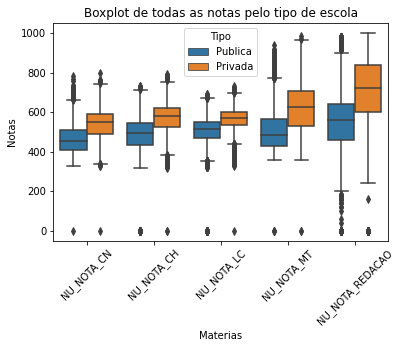


Menor variação entre a média das notas provinientes de escola pública e privada : 10.28 % 
Disciplina com a menor variação: NU_NOTA_LC


Maior variação entre a média das notas provinientes de escola pública e privada : 23.84 % 
Disciplina com a menor variação: NU_NOTA_REDACAO


In [ ]:
sns.boxplot(x="Materias", y = "Notas", data = complete_df_analise_2,hue="Tipo")
plt.title("Boxplot de todas as notas pelo tipo de escola")
plt.xticks(rotation=45)
plt.show()

print(f"\nMenor variação entre a média das notas provinientes de escola pública e privada : {round(n_min,2)} % \nDisciplina com a menor variação: {Menor_dif}")
print(f"\n\nMaior variação entre a média das notas provinientes de escola pública e privada : {round(n_max,2)} % \nDisciplina com a menor variação: {Maior_dif}")

>3.2 Premissas e conclusões

Premissas:

As mesmas premissas da seção 2.2.

Conclusões:

*   A disciplica com menor variação na média das notas é linguagens e códigos com 10,28%;
*   Essa menor variação pode ser devido ao fato de que o range da maior concentração de notas para essa disciplina também é menor do que para as outras disciplinas como pode ser visto no gráfico.
*   A disciplica com maior variação na média das notas é redação com 23.84%;
*   Essa maior variação pode ser devido ao fato de que o range da maior concentração de notas para essa disciplina também é maior do que para as outras disciplinas como pode ser visto no gráfico. Além disso a avaliação da redação é composta por 5 competências, o que pode contribuir para a maior variação da nota. Essa subdivisão em competências será avaliada no seção de machine learning.



####4. Modelos de machine learning 

>4.1 Objetivo

Avaliar qual modelo responde melhor entre escolas públicas e privadas para prever a nota da competência 3 de redação dadas as notas das competências 1, 2, 4 e 5.

>4.2 Escolas públicas

In [ ]:
todas_competencias = ["NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP4","NU_NOTA_COMP5","NU_NOTA_COMP3"]
competencias_entrada = ["NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP4","NU_NOTA_COMP5"]
competencias_saida = ["NU_NOTA_COMP3"]
dados_enem_escola_publica = dados_enem_escola_publica[todas_competencias].dropna()
x_publica = dados_enem_escola_publica[competencias_entrada]
y_publica = dados_enem_escola_publica[competencias_saida] 

def regressor_arvore_pub(nivel, splits):
  SEED= 2310
  np.random.seed(SEED)
  partes = KFold(n_splits = splits, shuffle=True)
  modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
  resultados = cross_validate(modelo_arvore, x_publica, y_publica, cv= partes, scoring="neg_mean_absolute_error", return_train_score=True)
  y_pred = cross_val_predict(modelo_arvore, x_publica, y_publica, cv=splits)
  treino = (resultados['train_score']*-1).mean()
  teste = (resultados['test_score']*-1).mean()

  y_original = y_publica.values.T.squeeze()
  y_matem = y_pred

  erro = y_matem - y_original
  media_erro = erro.mean()
  erro_sup = erro.mean()+2*erro.std()
  erro_inf = erro.mean()-2*erro.std()

  sns.histplot(erro, stat="probability")

  print(f"Camada: {nivel} | Divisão: {splits} | Desvio padrão: {round(erro.std(),2)} | Treino = {round((resultados['train_score']*-1).mean(),2)} | Teste = {round((resultados['test_score']*-1).mean(),2)} | Intervalo de confiança {round(erro_sup,2)} a {round(erro_inf,2)}")


Camada: 3, Divisão: 5, Desvio padrão: 17.26, Treino = 11.44|Teste = 11.45 
Camada: 3, Divisão: 6, Desvio padrão: 17.26, Treino = 11.44|Teste = 11.45 
Camada: 3, Divisão: 7, Desvio padrão: 17.26, Treino = 11.44|Teste = 11.45 
Camada: 4, Divisão: 5, Desvio padrão: 15.73, Treino = 11.74|Teste = 11.77 
Camada: 4, Divisão: 6, Desvio padrão: 15.73, Treino = 11.75|Teste = 11.77 
Camada: 4, Divisão: 7, Desvio padrão: 15.72, Treino = 11.74|Teste = 11.77 
Camada: 5, Divisão: 5, Desvio padrão: 15.09, Treino = 11.14|Teste = 11.18 
Camada: 5, Divisão: 6, Desvio padrão: 15.1, Treino = 11.05|Teste = 11.09 
Camada: 5, Divisão: 7, Desvio padrão: 15.09, Treino = 11.01|Teste = 11.06 
Camada: 6, Divisão: 5, Desvio padrão: 14.72, Treino = 10.69|Teste = 10.77 
Camada: 6, Divisão: 6, Desvio padrão: 14.72, Treino = 10.69|Teste = 10.79 
Camada: 6, Divisão: 7, Desvio padrão: 14.73, Treino = 10.67|Teste = 10.77 
Camada: 7, Divisão: 5, Desvio padrão: 14.57, Treino = 10.43|Teste = 10.59 
Camada: 7, Divisão: 6, Des

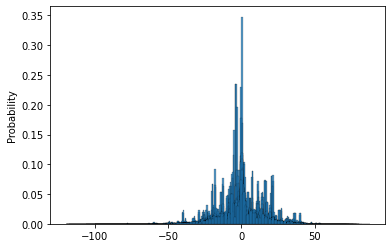

In [ ]:
for i in range(3,10):

  for j in range(5,8):
    regressor_arvore_pub(i,j)

Camada: 6 | Divisão: 5 | Desvio padrão: 14.72 | Treino = 10.69 | Teste = 10.77 | Intervalo de confiança 29.43 a -29.46


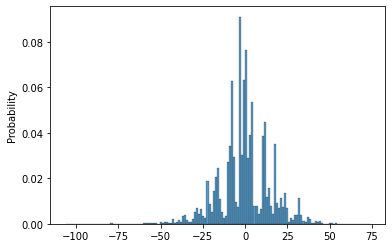

In [ ]:
regressor_arvore_pub(6, 5)

>4.3 Escolas privadas

In [ ]:
todas_competencias = ["NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP4","NU_NOTA_COMP5","NU_NOTA_COMP3"]
competencias_entrada = ["NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP4","NU_NOTA_COMP5"]
competencias_saida = ["NU_NOTA_COMP3"]
dados_enem_escola_privada = dados_enem_escola_privada[todas_competencias].dropna()
x_privada = dados_enem_escola_privada[competencias_entrada]
y_privada = dados_enem_escola_privada[competencias_saida] 

def regressor_arvore_pri(nivel, splits):
  SEED= 2310
  np.random.seed(SEED)
  partes = KFold(n_splits = splits, shuffle=True)
  modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
  resultados = cross_validate(modelo_arvore, x_privada, y_privada, cv= partes, scoring="neg_mean_absolute_error", return_train_score=True)
  y_pred = cross_val_predict(modelo_arvore, x_privada, y_privada, cv=splits)
  treino = (resultados['train_score']*-1).mean()
  teste = (resultados['test_score']*-1).mean()

  y_original = y_privada.values.T.squeeze()
  y_matem = y_pred

  erro = y_matem - y_original
  media_erro = erro.mean()
  erro_sup = erro.mean()+2*erro.std()
  erro_inf = erro.mean()-2*erro.std()

  sns.histplot(erro, stat="probability")

  print(f"Camada: {nivel} | Divisão: {splits} | Desvio padrão: {round(erro.std(),2)} | Treino = {round((resultados['train_score']*-1).mean(),2)} | Teste = {round((resultados['test_score']*-1).mean(),2)} | Intervalo de confiança {round(erro_sup,2)} a {round(erro_inf,2)}")

Camada: 3 | Divisão: 5 | Desvio padrão: 17.99 | Treino = 13.27 | Teste = 13.3 | Intervalo de confiança 35.97 a -35.97
Camada: 3 | Divisão: 6 | Desvio padrão: 18.0 | Treino = 13.28 | Teste = 13.3 | Intervalo de confiança 35.93 a -36.06
Camada: 3 | Divisão: 7 | Desvio padrão: 18.0 | Treino = 13.28 | Teste = 13.3 | Intervalo de confiança 35.98 a -36.0
Camada: 4 | Divisão: 5 | Desvio padrão: 16.89 | Treino = 12.79 | Teste = 12.89 | Intervalo de confiança 33.76 a -33.8
Camada: 4 | Divisão: 6 | Desvio padrão: 16.91 | Treino = 12.79 | Teste = 12.95 | Intervalo de confiança 33.81 a -33.83
Camada: 4 | Divisão: 7 | Desvio padrão: 16.87 | Treino = 12.8 | Teste = 12.9 | Intervalo de confiança 33.71 a -33.77
Camada: 5 | Divisão: 5 | Desvio padrão: 16.49 | Treino = 12.16 | Teste = 12.51 | Intervalo de confiança 32.98 a -32.99
Camada: 5 | Divisão: 6 | Desvio padrão: 16.54 | Treino = 12.23 | Teste = 12.61 | Intervalo de confiança 33.07 a -33.08
Camada: 5 | Divisão: 7 | Desvio padrão: 16.46 | Treino = 

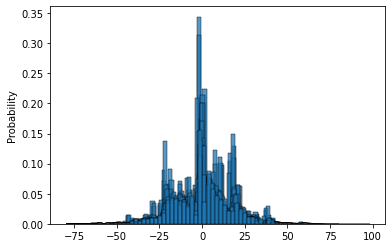

In [ ]:
for i in range(3,10):

  for j in range(5,8):
    regressor_arvore_pri(i,j)

Camada: 6 | Divisão: 5 | Desvio padrão: 16.38 | Treino = 11.89 | Teste = 12.43 | Intervalo de confiança 32.84 a -32.69


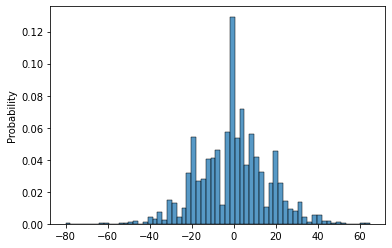

In [ ]:
regressor_arvore_pri(6, 5)

>4.4 Premissas e conclusões

Premissas:

As mesmas premissas da seção 2.2.

Conclusões:

*   O desvio padrão do modelo para escolas públicas é menor do que o desvio padrão do modelo para escolas privadas, o que significa que o primeiro modelo está prevendo melhor a nota da competência 3 da redação;
*   Isso pode ser devido ao fato que as notas de redação das escolas privadas está mais distribuído do que as notas das escola públicas, como pode ser visto do boxplot da seção 3.1.